# CS - 3. Common Algorithms - 3.5 Graph - 3.5.4 Dijkstra's Algorithm


## Dijkstra’s Algorithm
Dijkstra’s algorithm is a graph traversal algorithm that finds the shortest path between two nodes in a graph.

It is a weighted graph algorithm, meaning that each edge in the graph has a weight associated with it.

The algorithm works by finding the shortest path from the starting node to all other nodes in the graph.

It does this by keeping track of the distance from the starting node to each node, and then choosing the node with the shortest distance from the starting node to visit next.

It then updates the distance of each node from the starting node, and repeats the process until all nodes have been visited.

디크스트라의 알고리즘은 그래프에서 두 노드 사이의 최단 경로를 찾는 그래프 탐색 알고리즘입니다. 

가중 그래프 알고리즘으로, 그래프의 각 에지에는 가중치가 부여됩니다. 

이 알고리즘은 시작 노드에서 그래프의 다른 모든 노드까지 최단 경로를 찾는 방식으로 작동합니다. 

이 알고리즘은 시작 노드에서 각 노드까지의 거리를 추적한 다음, 시작 노드에서 다음 방문 노드로 가장 짧은 거리를 가진 노드를 선택하는 방식으로 수행됩니다. 

그런 다음 시작 노드에서 각 노드의 거리를 업데이트하고 모든 노드를 방문할 때까지 이 과정을 반복합니다.

다익스트라 알고리즘( Dijkstra's Algorithm)은

1.2.4 Graph representation, 1.3 Heap 에서 언급을 한번 했었다.

(https://parkpakrsu.tistory.com/331 - 힙과 관련된 알고리즘)

 

다익스트라 알고리즘은 그래프에서 한 점에서 다른 점까지의 최단 경로를 찾는 알고리즘이다.

이 알고리즘은 '탐욕 알고리즘(Greedy Algorithms)'을 사용하는데, 이는 매 단계에서 가장 비용이 적은 노드를 선택하는 방식이다.

 

다익스트라 알고리즘의 동작은 이런 순서이다.

1. 시작 노드를 설정한다.

2. 최단 거리 표를 초기화 한다. (시작 노드의 거리는 0, 나머지 노드의 거리는 무한대)

3. 방문하지 않은 노드 중에서 가장 최단 거리가 짧은 노드를 선택한다.

4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계산, 최단 거리 표를 갱신한다.

5. 위 과정을 반복한다.

In Python

In [1]:
import heapq

def dijkstra(graph, start):
    # 각 노드의 시작 노드로부터의 거리를 저장하는 딕셔너리 생성
    # 초기에는 모든 노드의 거리를 무한대로 설정
    distances = {node: float('inf') for node in graph}
    distances[start] = 0  # 시작 노드의 거리는 0으로 설정
    
    # 우선순위 큐 생성
    queue = []
    # 시작 노드의 거리(0)와 시작 노드를 우선순위 큐에 넣음
    heapq.heappush(queue, [distances[start], start])

    while queue:  # 큐가 비어있지 않은 동안
        # 우선순위 큐에서 가장 거리가 짧은 노드에 대한 거리와 해당 노드를 꺼냄
        current_distance, current_node = heapq.heappop(queue)

        # 기존에 계산한 해당 노드의 최단 거리가 더 짧다면, 무시
        if distances[current_node] < current_distance:
            continue

        # 인접 노드, 가중치를 순회
        for adjacent, weight in graph[current_node].items():
            # 선택된 노드를 거쳐 인접 노드로 가는 거리를 계산
            distance = current_distance + weight

            # 만약 시작 노드에서 인접 노드로 바로 가는 거리보다 현재 계산한 거리가 더 짧다면
            if distance < distances[adjacent]:
                # 인접 노드까지의 최단 거리를 업데이트
                distances[adjacent] = distance
                # 다음 인접 노드의 거리와 다음 인접 노드를 큐에 넣음
                heapq.heappush(queue, [distance, adjacent])

    # 모든 노드로의 최단 거리를 반환
    return distances


시작 노드에서  각 노드까지의 최단 거리를 딕셔너리 형태로 반환합니다.

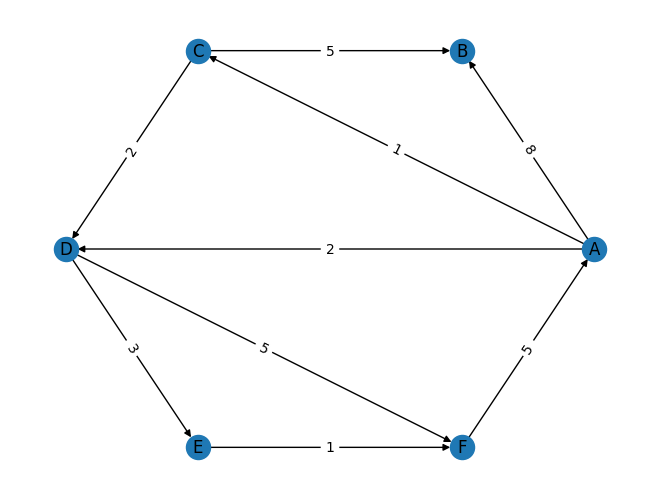

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    'A': {'B': 8, 'C': 1, 'D': 2},
    'B': {},
    'C': {'B': 5, 'D': 2},
    'D': {'E': 3, 'F': 5},
    'E': {'F': 1},
    'F': {'A': 5}
}

G = nx.DiGraph()

for node, neighbours in graph.items():
    for neighbour, weight in neighbours.items():
        G.add_edge(node, neighbour, weight=weight)

pos = nx.circular_layout(G)  # 원형 레이아웃을 사용합니다.
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


예시로 이런 형태의 그래프를 다익스트라 알고리즘을 통해 A 노드에서의 최단거리를 알아보겠습니다.

In [2]:
graph = {
    'A': {'B': 8, 'C': 1, 'D': 2},
    'B': {},
    'C': {'B': 5, 'D': 2},
    'D': {'E': 3, 'F': 5},
    'E': {'F': 1},
    'F': {'A': 5}
}
start_node = 'A'
print(dijkstra(graph, start_node))


{'A': 0, 'B': 6, 'C': 1, 'D': 2, 'E': 5, 'F': 6}


A-A 자기 자신이니 0,

A-B 8, A-C-B 가 1+5 로 6. 따라서 최소값 6

이런식으로 다익스트라 알고리즘의 작동을 확인할 수 있습니다.

 

## 활용
 

다익스트라 알고리즘은 다양한 상황에서 활용할 수 있습니다.

예를 들어, 네트워크 라우팅, GPS, 전력 그리드, SNS 친구추천 등 

어떤 노드에서 - 다른 노드로 가는 최단 경로를 찾는 문제를 효율적으로 해결할 수 있습니다.

 